# Use K Means to compress color spaces of images

One common example of K Means Clustering is to compress the colour spaces of images. An image usually comes with a 24-bit colour depth, meaning 2^24 = 16,777,216 colour variations.

K Means can be used to organize the colour variations into the their respective colour clusters. The "K" (number of cluster) here will be the the number of colour space. If K is set to 8, the available colour space is 8. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
%matplotlib inline

Read your image by using skimage and load it into a numpy array.

In [2]:
url = "https://ia801402.us.archive.org/2/items/ml-fundamentals-data/machine-learning-fundamentals-data/cat.jpg"
image = io.imread(url)

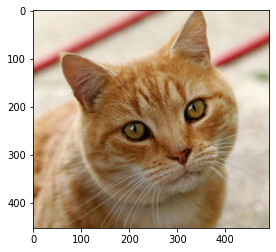

In [3]:
plt.imshow(image)

Show the dimension of the input picture, (Height, Width, Depth)

In [4]:
image.shape

(453, 492, 3)

Every colour channel has 256 possible values, the number of possible colours is 256 * 256 * 256 = 16,777,216, approx 16 million colours. Let us reduce the color space from 16 million to 8 colours.

In [5]:
image_scaled = image / 255.0 # use 0...1 scale
image_scaled = image_scaled.reshape((-1, 3))
image_scaled.shape

(222876, 3)

In [6]:
from sklearn.cluster import KMeans 
num_clusters = 8
model = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)


In [7]:
model.fit(image_scaled.astype(np.float32))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Get the: 
- cluster_centers_ : Coordinates of cluster centers.
- labels_ : Labels of each point
- inertia_ : Sum of squared distance from each point to their corresponding center

In [8]:
centroids = model.cluster_centers_
labels = model.labels_
inertia = model.inertia_

The generated clusters corresponds to the 8 colors of our reduced color palette.

Visual inspection of the centroids array shows that all colours have three channels (B, G, R) with values ranging between 0 and 1.

In [9]:
centroids

array([[0.5864572 , 0.37552038, 0.20921332],
       [0.912189  , 0.87487316, 0.81024677],
       [0.8305882 , 0.7487872 , 0.66548854],
       [0.6463718 , 0.503571  , 0.35598764],
       [0.4389574 , 0.2760165 , 0.12766686],
       [0.18824524, 0.09100488, 0.03102487],
       [0.7475661 , 0.62161213, 0.49272943],
       [0.4980384 , 0.4047601 , 0.2971573 ]], dtype=float32)

The labels will equal to the number of clusters that we have set.

In [10]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

These 8 colours correspond to the 8 cluster labels contained in the labels vector.

We want all our data points with label 0 to be colored according to row 0 in the centers array whereas all data points with label 1 to be colored according to row 1 in the centers array and same for other labels.

We use labels as an index into the centroids array which is also represents our new colours.

In [11]:
new_colours = centroids[labels].reshape((-1, 3))

In [12]:
image_compressed = new_colours.reshape(image.shape)

Text(0.5, 1.0, '8 Colour Image')

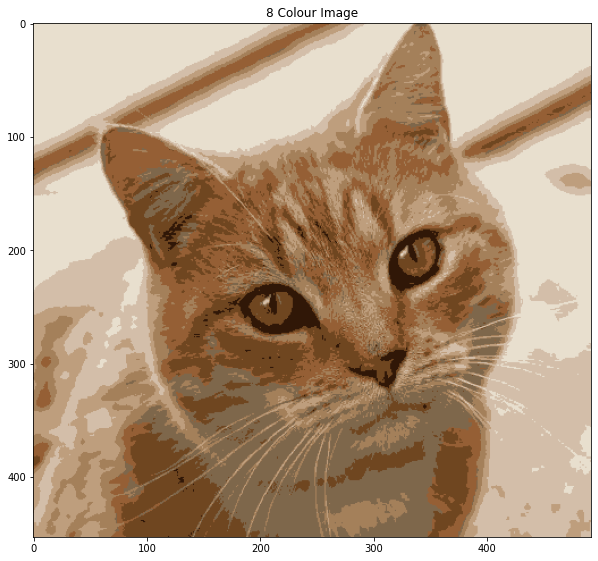

In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(image_compressed);
plt.title('8 Colour Image')

Let try to do another round of color space compression but this time we only manipulate the 1 channel colour space.

In [14]:
url = "https://ia801402.us.archive.org/2/items/ml-fundamentals-data/machine-learning-fundamentals-data/cat.jpg"
image = io.imread(url, as_gray=True)

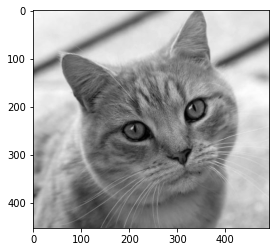

In [15]:
plt.imshow(image, cmap='gray')

In [16]:
image.shape

(453, 492)

Scale the pixel values into a range of 0 to 1.

In [17]:
image_scaled = image / 255.0 
image_scaled = image_scaled.reshape((-1, 1))
image_scaled.shape

(222876, 1)

In [18]:
image_scaled

array([[0.00369497],
       [0.00369497],
       [0.00369497],
       ...,
       [0.00274345],
       [0.00275883],
       [0.00275883]])

In [19]:
from sklearn.cluster import KMeans 
num_clusters = 4
model = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

In [20]:
model.fit(image_scaled.astype(np.float32))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
centroids = model.cluster_centers_
labels = model.labels_
inertia = model.inertia_

In [22]:
centroids

array([[0.00336091],
       [0.00182586],
       [0.00120123],
       [0.0026213 ]], dtype=float32)

In [23]:
new_colours = centroids[labels].reshape((-1, 1))

In [24]:
image_compressed = new_colours.reshape(image.shape)

Text(0.5, 1.0, '4 Colour Image')

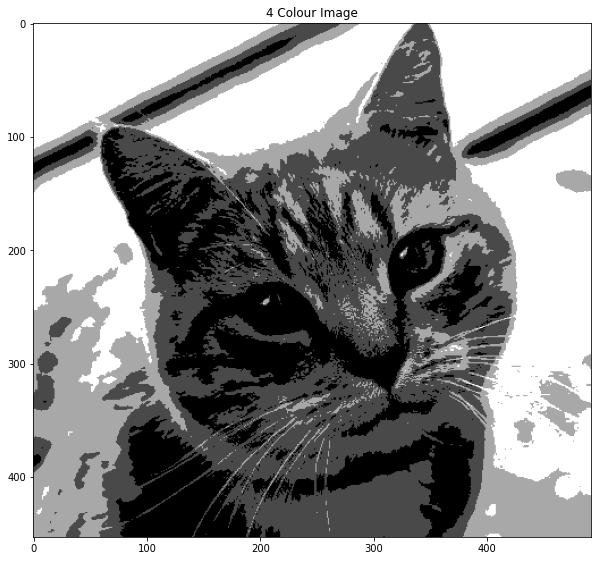

In [25]:
plt.figure(figsize=(10, 10))
plt.imshow(image_compressed, cmap='gray');
plt.title('4 Colour Image')